# Homework Assignment #1

*due Tuesday, February 5, 2019 by 11:59pm*

This homework is worth **10 points** [100%] with the option to score **extra 1.5 points [15%]** if you submit the additional questions.

### n.b.
All deliverables are required to be typed and all graphs and statistical output generated in Jupyter Notebook using Python and associated packages. Deliverables with *any* handwritten elements will not be accepted and will receive a grade of zero. 

You are required to upload the ```ipynb``` file to **your private GitHub repository within the MSCS686 organization** as the deliverable. Use the ```homework_01.ipynb``` file as a template and write the answers in text and include relevant code below each question. 

In [105]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

### Data
Make sure you completed the following:
* Created `data` directory in the `hw1` folder
* Downloaded the [housing data](https://s3-us-west-1.amazonaws.com/usfca-cs686-ml/hw1/housing.csv) to the `data` directory

In [63]:
# Path to housing.csv
data_path = os.path.join("data", "housing.csv")

if not os.path.exists(data_path):
    print("Download data first!")

## Part 1: Read & clean data [total of 50%]

#### 1.1 Read the data to a pandas DataFrame, print the first 7 entries [10%]
**IMPORTANT**: Read the data so that **`Id`** is set as the index column.<br/>
HINT: Refer to the [docs](https://pandas.pydata.org/pandas-docs/stable/index.html)

In [64]:
df = pd.read_csv(data_path)
print(df[:7])

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
4 

#### 1.2 Print the names of columns, and number of rows and columns in the DataFrame [10%]

In [65]:
print("columns: " + df.columns)
print("num rows: %d" % df.shape[0])
print("num col: %d" % df.shape[1])

Index(['columns: Id', 'columns: MSSubClass', 'columns: MSZoning',
       'columns: LotFrontage', 'columns: LotArea', 'columns: Street',
       'columns: Alley', 'columns: LotShape', 'columns: LandContour',
       'columns: Utilities', 'columns: LotConfig', 'columns: LandSlope',
       'columns: Neighborhood', 'columns: Condition1', 'columns: Condition2',
       'columns: BldgType', 'columns: HouseStyle', 'columns: OverallQual',
       'columns: OverallCond', 'columns: YearBuilt', 'columns: YearRemodAdd',
       'columns: RoofStyle', 'columns: RoofMatl', 'columns: Exterior1st',
       'columns: Exterior2nd', 'columns: MasVnrType', 'columns: MasVnrArea',
       'columns: ExterQual', 'columns: ExterCond', 'columns: Foundation',
       'columns: BsmtQual', 'columns: BsmtCond', 'columns: BsmtExposure',
       'columns: BsmtFinType1', 'columns: BsmtFinSF1', 'columns: BsmtFinType2',
       'columns: BsmtFinSF2', 'columns: BsmtUnfSF', 'columns: TotalBsmtSF',
       'columns: Heating', 'columns

#### 1.3

#### (a) Create a subset of original dataset with the  rows 200 to 1400 and the columns according to the list below. [5%]

In [66]:
# DO NOT CHANGE THIS CELL
cols = ['LotFrontage', 'LotArea', 'Neighborhood', 'OverallCond', 'YearBuilt', 'YrSold', 'GrLivArea', '1stFlrSF', '2ndFlrSF',
       'SaleCondition', 'SalePrice']

In [67]:
subset = df.loc[200:1400, cols]

In [68]:
subset.head(5)

,LotFrontage,LotArea,Neighborhood,OverallCond,YearBuilt,YrSold,GrLivArea,1stFlrSF,2ndFlrSF,SaleCondition,SalePrice
200,80.0,8546,Edwards,5,2003,2010,1121,1121,0,Normal,140000
201,75.0,10125,Mitchel,6,1977,2008,1279,1279,0,Normal,171500
202,50.0,7000,OldTown,6,1924,2006,1310,865,445,Normal,112000
203,NaN,4438,CollgCr,5,2004,2008,848,848,0,Normal,149000
204,50.0,3500,OldTown,7,1947,2009,1284,720,564,Normal,110000


#### (b) Rename column`YrSold` to `YearSold` [5%]

In [69]:
subset.rename(columns={"YrSold": "YearSold"}, inplace=True)

In [70]:
subset.head(5)

,LotFrontage,LotArea,Neighborhood,OverallCond,YearBuilt,YearSold,GrLivArea,1stFlrSF,2ndFlrSF,SaleCondition,SalePrice
200,80.0,8546,Edwards,5,2003,2010,1121,1121,0,Normal,140000
201,75.0,10125,Mitchel,6,1977,2008,1279,1279,0,Normal,171500
202,50.0,7000,OldTown,6,1924,2006,1310,865,445,Normal,112000
203,NaN,4438,CollgCr,5,2004,2008,848,848,0,Normal,149000
204,50.0,3500,OldTown,7,1947,2009,1284,720,564,Normal,110000


#### 1.4 Some values in the `LotFrontage` column are missing, fill them with *average* value [10%]

In [71]:
subset["LotFrontage"].isnull().any()

True

In [72]:
subset["LotFrontage"] = subset["LotFrontage"].fillna(value=subset["LotFrontage"].mean())

In [73]:
subset["LotFrontage"].isnull().any()

False

In [74]:
subset

,LotFrontage,LotArea,Neighborhood,OverallCond,YearBuilt,YearSold,GrLivArea,1stFlrSF,2ndFlrSF,SaleCondition,SalePrice
200,80.000000,8546,Edwards,5,2003,2010,1121,1121,0,Normal,140000
201,75.000000,10125,Mitchel,6,1977,2008,1279,1279,0,Normal,171500
202,50.000000,7000,OldTown,6,1924,2006,1310,865,445,Normal,112000
203,69.822874,4438,CollgCr,5,2004,2008,848,848,0,Normal,149000
204,50.000000,3500,OldTown,7,1947,2009,1284,720,564,Normal,110000
205,99.000000,11851,Gilbert,5,1990,2009,1442,1442,0,Normal,180500
206,40.000000,13673,Sawyer,5,1962,2007,1696,1696,0,Normal,143900
207,69.822874,12493,NAmes,5,1960,2008,1100,1100,0,Normal,141000
208,69.822874,14364,SawyerW,5,1988,2007,2062,1180,882,Normal,277000
209,75.000000,8250,NAmes,7,1964,2008,1092,1092,0,Normal,145000


#### 1.5 Answer the following questions with the *subset* of the data:
Each subquestion is worth **1%**

#### 1.5.1 What were the basic statistics of house prices? (mean, std, min, 25%, 50%, 75%, max)

In [96]:
subset["SalePrice"].describe()

count      1201.000000
mean     180822.348876
std       80509.298156
min       34900.000000
25%      130000.000000
50%      162900.000000
75%      213490.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### 1.5.2 What's the average lot size in square feet? How about the standard deviation?
HINT: Use the column `LotArea`

In [76]:
print(subset["LotArea"].mean())
print(subset["LotArea"].std())

10582.015820149874
10772.869559557923


#### 1.5.3 What year was the oldest house build?

In [77]:
print(subset["YearBuilt"].max())

2010


#### 1.5.4 Follow-up question to the previous one: What was the sale condition of that house?

In [78]:
row = subset["YearBuilt"].idxmax()
subset["SaleCondition"][row]

'Partial'

#### 1.5.5 How many houses were built in 2008? How about 2009?

In [79]:
print("Built in 2008: %d" % subset[subset.YearBuilt == 2008].shape[0])
print("Built in 2009: %d" % subset[subset.YearBuilt == 2009].shape[0])

Built in 2008: 19
Built in 2009: 15


#### 1.5.6 Break-down median prices of houses by year in sold they were sold

In [80]:
subset.groupby(by="YearBuilt")["SalePrice"].median()

YearBuilt
1872    122000.0
1875     94000.0
1880    194989.5
1882    168000.0
1890    142200.0
1892    107500.0
1893    325000.0
1898    106000.0
1900    104513.0
1904    157500.0
1905    163000.0
1906    135000.0
1908    240000.0
1910    114504.0
1911    130000.0
1912    127200.0
1913     90350.0
1914    128000.0
1915    153737.5
1916    140000.0
1917    129500.0
1918    157500.0
1919    174750.0
1920    108500.0
1921    131690.0
1922     99900.0
1923    187500.0
1924    109500.0
1925    121000.0
1926    108500.0
          ...   
1981    226750.0
1982    134900.0
1983    134000.0
1984    165000.0
1985    212000.0
1986    190000.0
1987    177500.0
1988    196500.0
1989    275000.0
1990    206250.0
1991    169600.0
1992    189000.0
1993    214000.0
1994    207500.0
1995    238000.0
1996    212000.0
1997    207600.0
1998    212125.0
1999    190000.0
2000    213000.0
2001    227000.0
2002    218750.0
2003    200500.0
2004    192000.0
2005    195350.0
2006    239899.5
2007    230000.0
2008

#### 1.5.7 What is the average difference between 1st Floor (`1stFlrSF`) and 2nd Floor (`2ndFlrSF`) square feet?

In [81]:
subset["1stFlrSF"].mean() - subset["2ndFlrSF"].mean()

809.9641965029143

#### 1.5.8 In what neighborhood is the most expensive house situated?

In [82]:
subset["Neighborhood"][subset["SalePrice"].idxmax()]

'NoRidge'

#### 1.5.9 What was the average price of houses with overall condition 8 or higher, built after 1960 (inclusive) and sold before 2009 (exclusive)?

In [83]:
subset.query("OverallCond >= 8 and YearBuilt >= 1960 and YearBuilt < 2009")["SalePrice"].mean()

163821.42857142858

#### 1.5.10 Display the house with id 987? Display the 472nd house in the dataset?

In [84]:
print(df[df["Id"] == 987].T.squeeze()) # or df[df["Id"] == 987]
print(df.loc[472])

Id                   987
MSSubClass            50
MSZoning              RM
LotFrontage           59
LotArea             5310
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Corner
LandSlope            Gtl
Neighborhood     OldTown
Condition1         Feedr
Condition2          Norm
BldgType            1Fam
HouseStyle        1.5Fin
OverallQual            6
OverallCond            8
YearBuilt           1910
YearRemodAdd        2003
RoofStyle            Hip
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType          None
MasVnrArea             0
ExterQual             TA
ExterCond             Gd
Foundation        CBlock
                  ...   
BedroomAbvGr           2
KitchenAbvGr           1
KitchenQual           Gd
TotRmsAbvGrd           5
Functional           Typ
Fireplaces             0
FireplaceQu          NaN
GarageType        Attchd
GarageYrBlt         1950


## Part 2: Plotting [total of 30%]

#### 2.1 Univariate (1 variable) [10%, 3.3% each]

#### 2.1.1 Plot the distribution of sale price

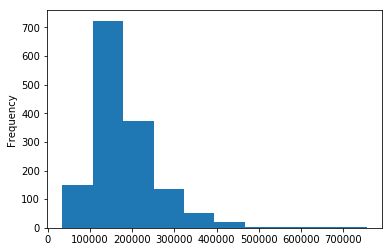

In [85]:
df["SalePrice"].plot.hist()

#### 2.1.2 Plot the histogram of the overall condition

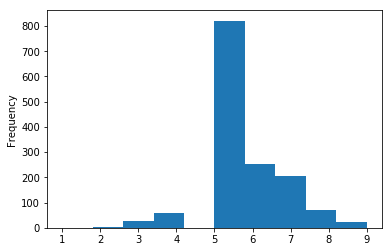

In [86]:
df["OverallCond"].plot.hist()

#### 2.1.3 Create one univariate plot of your own choice

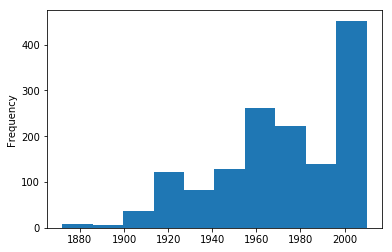

In [87]:
df["YearBuilt"].plot.hist()

#### 2.2 Bivariate (2 variables) [10%, 3.3% each]

#### 2.2.1 Plot the scatter plot displaying the relationship between above ground living area (`GrLivArea`) and sale price

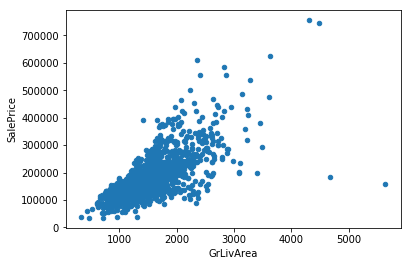

In [90]:
df.plot.scatter(x="GrLivArea", y="SalePrice")

#### 2.2.2 Plot the boxplot of the relationship between the overall condition and the sale price
HINT: The result should look something like [this](https://s3-us-west-1.amazonaws.com/usfca-cs686-ml/hw1/boxplot_result.png) (however, it's OK if yours looks different as long as you use the right type of plot, data and the right variables)

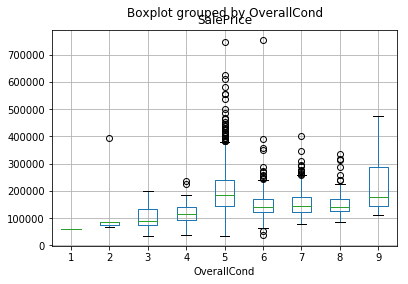

In [101]:
df.boxplot(column=["SalePrice"], by="OverallCond")

#### 2.2.3 Create one bivariate plot of your own choice

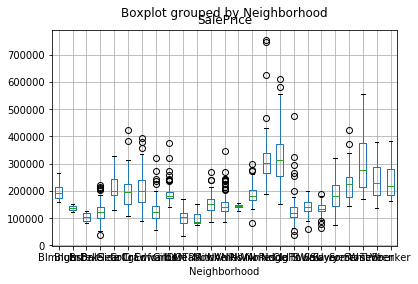

In [102]:
df.boxplot(column=["SalePrice"], by="Neighborhood")

#### 2.3 Multivariate (2+ variables) [10%, 3.3% each]

#### 2.3.1 Plot the scatter plot displaying the relationship between lot area and sale price, colored by the overall condition

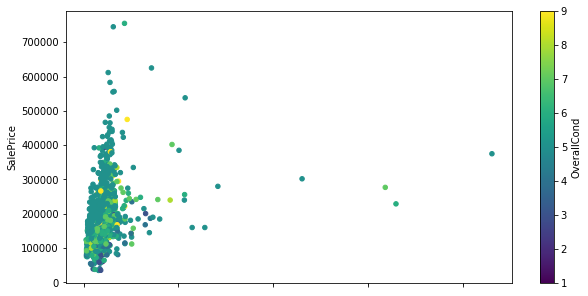

In [109]:
df.plot.scatter(x="LotArea", y="SalePrice", c="OverallCond", colormap="viridis")

#### 2.3.2 Create one multivariate plot of your own choice

Text(0.5, 0, 'LotFrontage')

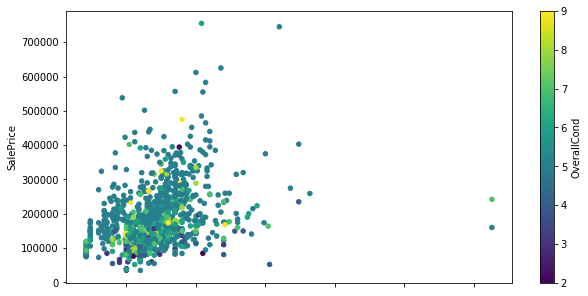

In [111]:
fig = df.plot.scatter(x="LotFrontage", y="SalePrice", c="OverallCond", colormap="viridis")
fig.set_xlabel("LotFrontage")

## Part 3: Theory [total of 20%]

### 3.1 Central Limit Theorem (CLT) [total of 10%]

#### 3.1.1 Create an array on 100 000 samples, sampled from a uniform distribution [2%]
HINT: check [this](https://docs.scipy.org/doc/numpy-1.14.5/reference/generated/numpy.random.uniform.html)

In [14]:
data = np.random.uniform(-1, 1, 100000)
df = pd.DataFrame(data)

#### 3.1.2 Plot the distribution of the data. Does it look like a uniform distribution?  [2%]
HINT: check [this](https://seaborn.pydata.org/tutorial/distributions.html)

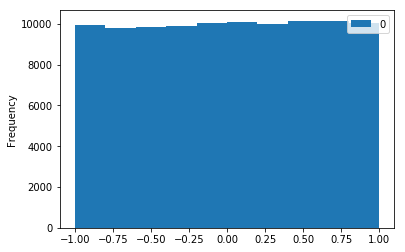

In [15]:
df.plot.hist() # Looks like a uniform distribution

#### 3.1.3 Randomly shuffle the data, create pairs ($n=2$) with the original and than average the value of the pair  [1.5%]
In other words:

1. Create new array by shuffling the data you sampled in `3.1.1` ([HINT](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.permutation.html))
2. Stack the new array with the original data into a single 2-D array of shape (100000, 2) ([HINT](https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html))
3. Average the newly formed 2-D array by 2nd dimension (i.e. mean with `axis=1`)

In [50]:
data2 = np.random.permutation(data)
arrays = [data, data2]
s = np.stack(arrays, axis=1)
d = np.mean(s, axis=1)

In [51]:
s.shape

(100000, 2)

#### 3.1.4 Similarly to `3.1.2`, plot the distribution of the pairs. What distribution does it look like? [1.5%]

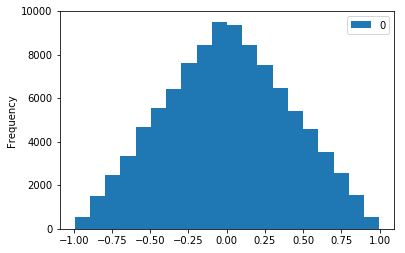

In [52]:
df = pd.DataFrame(d)
df.plot.hist(bins=20)

#### 3.1.5 Compute the mean and standard deviation of the original data and the newly formed data. [1.5%]

In [53]:
print(df.mean())
print(df.std())

0    0.0027
dtype: float64
0    0.407754
dtype: float64


#### 3.1.6 Repeat `3.1.3`, `3.1.4` and `3.1.5` for $n=5$. In one sentence, describe how the distribution have changed? Namely think about how the mean $\mu$ and stardard deviation $\sigma$ changed. [1%]
HINT: Similarly to `3.1.3`, shuffle the original data 4 times and then stack into a 2-D array of shape (100000,5). The remaining steps will be the same

In [54]:
data = np.random.uniform(-1, 1, 100000)
data2 = np.random.permutation(data)
data3 = np.random.permutation(data)
data4 = np.random.permutation(data)
data5 = np.random.permutation(data)

arrays = [data, data2, data3, data4, data5]

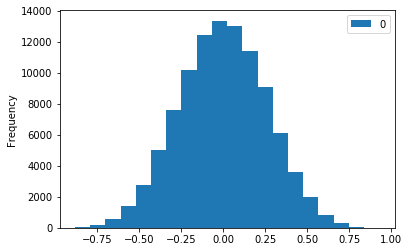

In [55]:
s = np.stack(arrays, axis=1)
s.shape
d = np.mean(s, axis=1)
df = pd.DataFrame(d)
df.plot.hist(bins=20)

#### 3.1.7 Now, do the same for $n=10$. [0.5%]

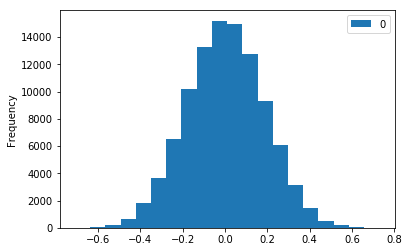

In [60]:
data = np.random.uniform(-1, 1, 100000)
arrays = [np.random.permutation(data) for i in range(10)]
s = np.stack(arrays, axis=1)
d = np.mean(s, axis=1)
df = pd.DataFrame(d)
df.plot.hist(bins=20)

### 3.2 Hypothesis Testing [total of 10%] 

In the following cell, there are data for a given experiment with 2 samples (Control group and Experimental group) with $n=30$ and $\sigma=2.9$.

In [61]:
# DO NOT CHANGE ANYTHING IN THIS CELL
data = np.array([[12.72,  8.83, 14.14, 14.49,  7.15,  8.53, 10.31, 10.59, 14.5 ,
        15.57, 11.67, 11.46, 20.96, 11.2 ,  9.61, 15.69, 13.04, 12.79,
         7.6 , 10.23,  5.63, 10.64, 10.5 ,  8.07, 13.01, 10.43, 11.47,
        11.18, 10.41, 11.71],
       [23.62, 15.67, 23.82, 15.43, 22.04, 23.02, 19.82, 17.13, 20.35,
        28.82, 22.32, 20.53, 21.46, 16.86, 19.16, 15.53, 19.74, 15.92,
        17.69, 20.68, 19.13, 20.51, 20.99, 15.15, 24.42, 22.73, 23.5 ,
        18.18, 16.37, 18.89]]).transpose()

df = pd.DataFrame(data, columns=["Control", "Experimental"])
df

,Control,Experimental
0,12.72,23.62
1,8.83,15.67
2,14.14,23.82
3,14.49,15.43
4,7.15,22.04
5,8.53,23.02
6,10.31,19.82
7,10.59,17.13
8,14.50,20.35
9,15.57,28.82


#### 3.2.1 Show whether there exists a statistically significnat difference between the "Control" group and the "Experimentla group at the $\alpha = 0.05$ level of significnace using Hypothesis testing (assume $\sigma = 2.9$) [8%]

#### 3.2.2 Now, confirm the above  the difference using Confidence intervals [total of 2%]

## Additional Question [OPTIONAL]

*All regular homework questions must be completed to receive any bonus points.*

#### 4.1 Bayes theorem [total of 5% extra]
Emma has lost her watch in either classroom $A$ (with a probability $0.4$) or in classroom $B$ (with a probability $0.6$). On any given break, if the watch is in $A$ and Emma spends the break searching for it in $A$, the conditional probability that she will find the watch during that break is $0.25$. Similarly, if the watch is in $B$ and Emma spends a break looking for it there, the conditional probability that she will find the watch during that break is $0.15$. The watch cannot be moved from one classroom to the other. Emma can search only during the break between classes, and she can move from one classroom to the other only during classes.

1. In which classroom should Emma look to maximize the probability that she finds her watch on the first
    break of the search?
2. Given that Emma looked in $A$ during the first break but didn’t find her watch, what is the probability
    that the watch is in $A$?
3. If Emma flips a fair coin to determine where to look during the first break and finds the watch during
    the first break, what is the probability that she looked in $A$?
4. If the watch is not stolen and not found by the Nth break of the search, it will be stolen that break
    with probability $\frac{N}{N+2}$. Emma has decided to look in $A$ during the first two breaks. What is the
    probability that she will find her watch for the first time during the second break?
    
##### Refresher:
* **Law of total probability** $$P(A) = \sum_{n}{P(A|B_{n}) P(B_{n})}$$
* **Bayes theorem** - $$P(B|A) = \frac{P(A|B) P(B)}{P(A)}$$

**Type your answer in this cell**

Use $\LaTeX$ where appropriate

#### 4.2 Kaggle exploratory data analysis [total of 10% extra]

This is more of an open-ended question related to the on-going [Kaggle](https://www.kaggle.com/) competition: [Elo Merchant Category Recommendation](https://www.kaggle.com/c/elo-merchant-category-recommendation). In order to get the extra credit you need to **either**:

* Download the [data](https://www.kaggle.com/c/elo-merchant-category-recommendation/data), create a new Jupyter Notebook (outside of this one) and perform an exploratory data analysis of your own. Your submission will then be the **.ipynb file** with EDA of the competition data.
* Create a [Kaggle kernel](https://www.kaggle.com/c/elo-merchant-category-recommendation/kernels) (i.e. a Jupyter notebook that runs on Kaggle's infrastructure). Your submission will then be the **URL** to the Kaggle kernel.

Feel free look for inspiration in other Kaggle kernels, **however do not copy/paste any code without citing the source.** If you do copy a piece of code without the appropriate resource citing, you will be deducted 1 point. In order to receive the extra credit, at least 50% of the notebook should be your own work. This question will be graded on a continuous scale, the more extensive your analysis, the more points will be attributed.